In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Baseline models

## Hip 

### Running

In [4]:
def plot_joint_angle(gait_cycle_range, predicted, ground_truth, ylabel, ylim, title, color):
    """
    Plots a single joint angle comparison between predicted and ground truth.
    """
    plt.figure(figsize=(6, 4))
    plt.plot(gait_cycle_range, predicted, f'{color}--', label="Predicted")
    plt.plot(gait_cycle_range, ground_truth, 'gray', linewidth=3, label="Ground Truth")
    plt.xlabel("Gait Cycle (%)")
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    plt.legend()
    plt.title(title)
    plt.show()

def process_and_plot_gait_cycle(y_pred, y_test, subject_index):
    """
    Extracts gait cycle data and plots joint angles for a given subject.
    """
    # Extract data for the subject
    subject_data = y_pred[subject_index]  # shape: (3200, 3)
    flexion, abduction, rotation = subject_data[:, 0], subject_data[:, 1], subject_data[:, 2]

    # Identify gait cycle using Heel Strike (local minima of flexion)
    peaks, _ = find_peaks(-flexion, distance=100)  # Heel Strike points
    if len(peaks) < 2:
        raise ValueError("Not enough gait cycles detected.")

    # Define gait cycle range
    gait_cycle_indices = peaks[:2]
    gait_cycle_range = np.linspace(0, 100, gait_cycle_indices[1] - gait_cycle_indices[0])

    # Extract predicted gait cycle data
    flexion_gait = flexion[gait_cycle_indices[0]:gait_cycle_indices[1]]
    abduction_gait = abduction[gait_cycle_indices[0]:gait_cycle_indices[1]]
    rotation_gait = rotation[gait_cycle_indices[0]:gait_cycle_indices[1]]

    # Load Ground Truth data
    subject_test_data = y_test[subject_index]  # shape: (3200, 3)

    # Extract Ground Truth data within the gait cycle
    flexion_gait_test = subject_test_data[gait_cycle_indices[0]:gait_cycle_indices[1], 0]
    abduction_gait_test = subject_test_data[gait_cycle_indices[0]:gait_cycle_indices[1], 1]
    rotation_gait_test = subject_test_data[gait_cycle_indices[0]:gait_cycle_indices[1], 2]

    # Set Y-axis range (adjusted based on reference paper figures)
    flexion_ylim = (0, 100)
    abduction_ylim = (-40, 40)
    rotation_ylim = (-40, 40)

    # Plot data
    plot_joint_angle(gait_cycle_range, flexion_gait, flexion_gait_test, "Ext (-) / Flex (+) (°)", flexion_ylim, "Flexion/Extension", 'r')
    plot_joint_angle(gait_cycle_range, -abduction_gait, -abduction_gait_test, "Abd (-) / Add (+) (°)", abduction_ylim, "Abduction/Adduction", 'g')
    plot_joint_angle(gait_cycle_range, -rotation_gait, -rotation_gait_test, "Ext (-) / Int (+) Rot (°)", rotation_ylim, "Internal/External Rotation", 'b')


In [ ]:
# Load data
y_pred = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Prediction/Hip/Running/y_pred_test.npy")  
y_test = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Prediction/Hip/Running/y_test.npy")  

# Example usage
process_and_plot_gait_cycle(y_pred, y_test, subject_index=24)

In [ ]:
pred = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Prediction/Hip/Running/y_pred_test.npy")
print(pred.shape)

In [11]:
gt = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Prediction/Hip/Running/y_test.npy")
print(gt.shape)

(148, 3600, 3)


## Knee

### Running

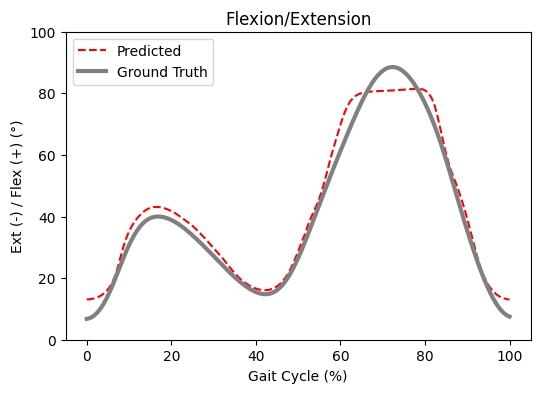

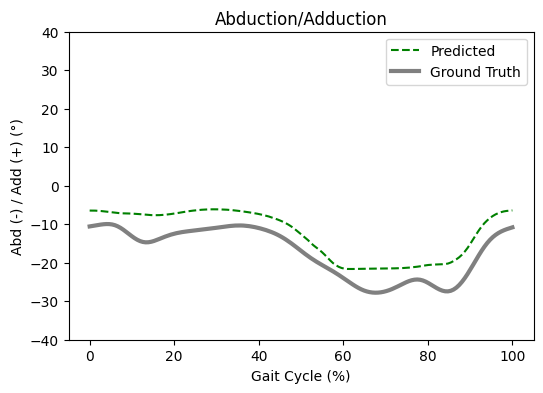

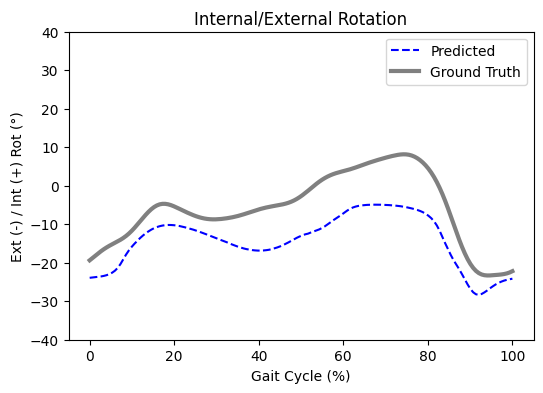

In [70]:
# Load data
y_pred = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/predictions-results/Running/Knee/predictions/y_pred_test.npy")  
y_test = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/predictions-results/Running/Knee/predictions/y_test.npy")  

# Example usage
process_and_plot_gait_cycle(y_pred, y_test, subject_index=51)

### Walking

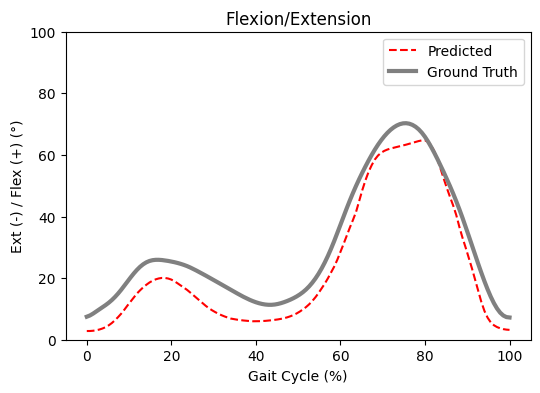

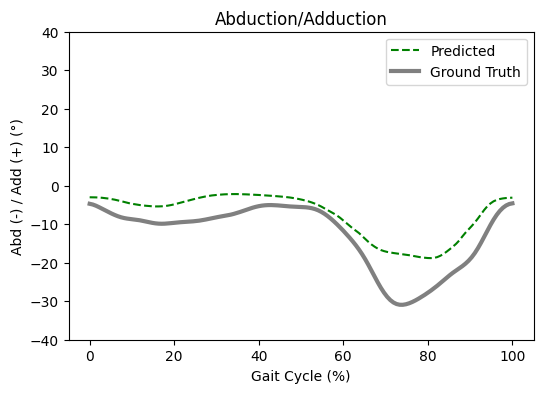

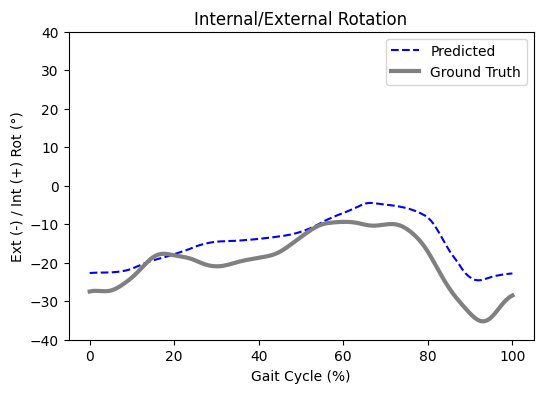

In [71]:
# Load data
y_pred = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/predictions-results/Walking/Knee/predictions/y_pred_test.npy")  
y_test = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/predictions-results/Walking/Knee/predictions/y_test.npy")  

# Example usage
process_and_plot_gait_cycle(y_pred, y_test, subject_index=51)

# Transformer

## Knee


### Running

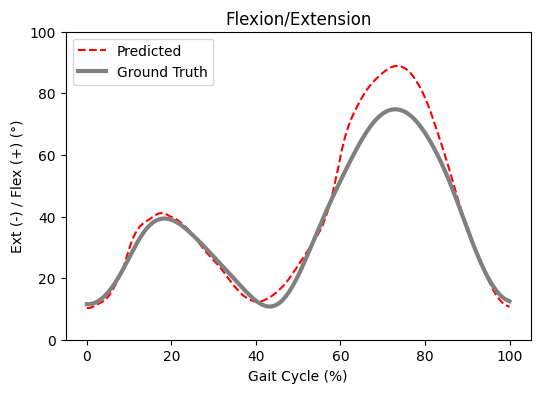

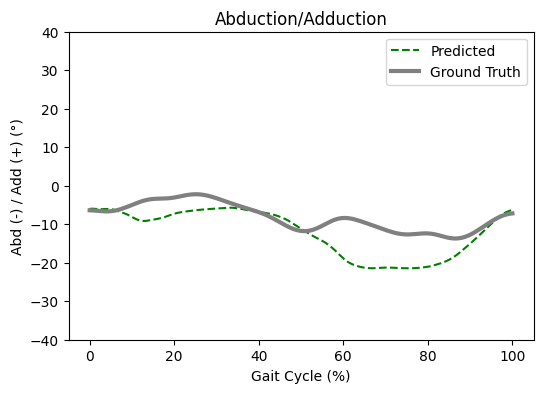

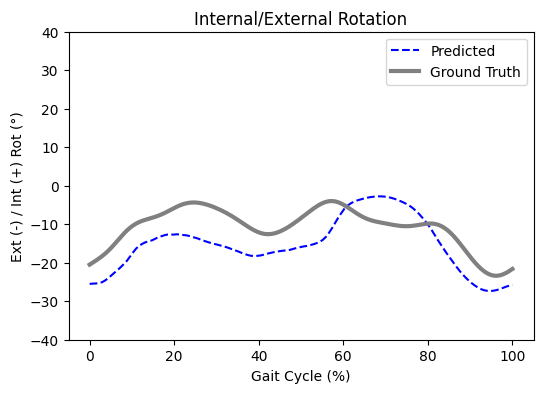

In [5]:
# Load data
y_pred = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/predictions-results/transformer/Running/Knee/y_pred_test.npy")  
y_test = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/predictions-results/transformer/Running/Knee/y_test.npy")  

# Example usage
process_and_plot_gait_cycle(y_pred, y_test, subject_index=4)

### Walking

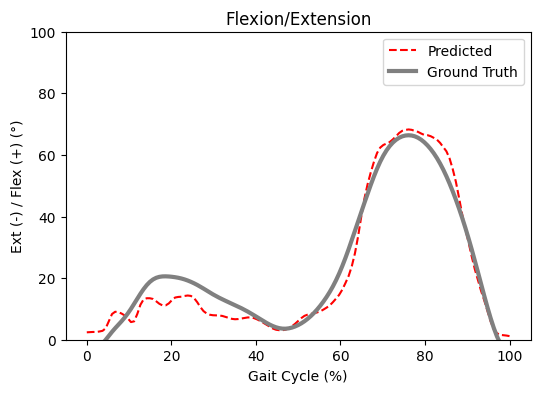

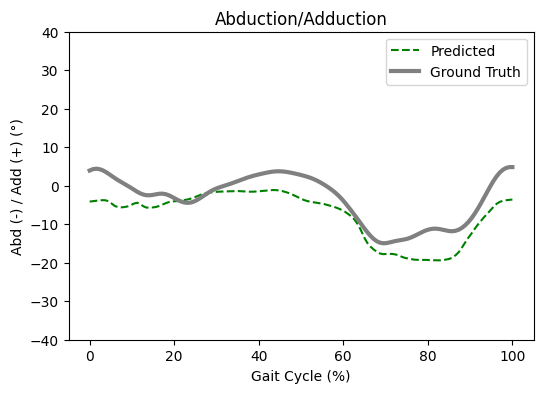

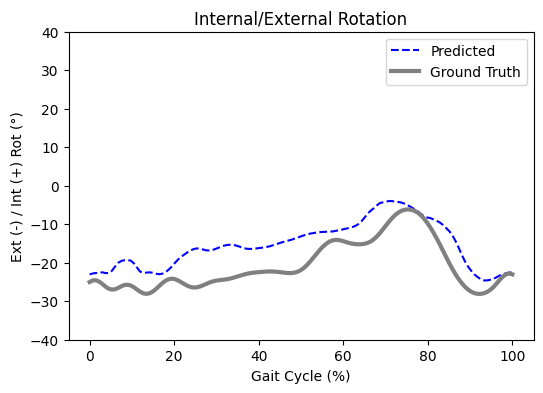

In [72]:
# Load data
y_pred = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/predictions-results/transformer/Walking/Knee/y_pred_test.npy")  
y_test = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/predictions-results/transformer/Walking/Knee/y_test.npy")  

# Example usage
process_and_plot_gait_cycle(y_pred, y_test, subject_index=4)